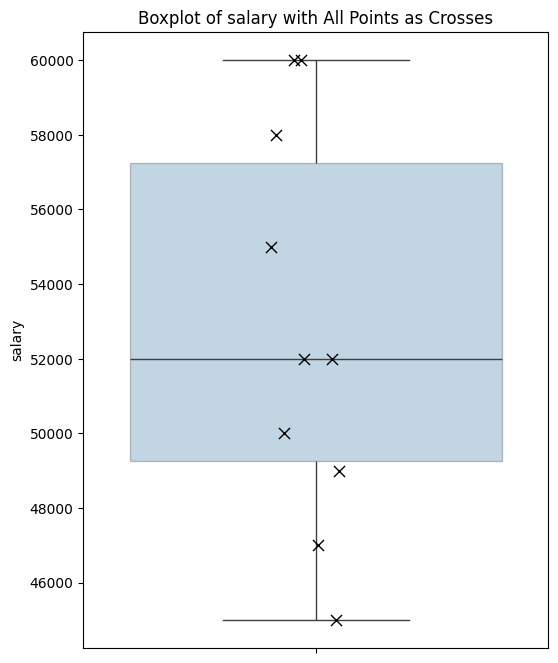

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_boxplot_with_points(df, column):
    """
    Show the boxplot of a variable in a DataFrame and overlay the data points as crosses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name of the variable to visualize.

    Returns:
    None
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 8))
    
    # Boxplot
    sns.boxplot(y=df[column], showfliers=False, boxprops={'alpha': 0.3})  # Make it vertical with y= instead of x=
    
    # Overlay the data points as crosses
    sns.stripplot(y=df[column], jitter=True, marker='x', color='black', size=8, linewidth=1)
    
    plt.title(f'Boxplot of {column} with All Points as Crosses')
    
    # Display the plot
    plt.show()

# Example usage
import pandas as pd

# Example DataFrame
data = {
    'age': [23, 45, 31, 35, 43, 25, 40, 42, 33, 39],
    'salary': [50000, 60000, 45000, 52000, 58000, 47000, 55000, 60000, 49000, 52000]
}
df = pd.DataFrame(data)

# Show boxplot with all points as crosses for 'salary'
show_boxplot_with_points(df, 'salary')


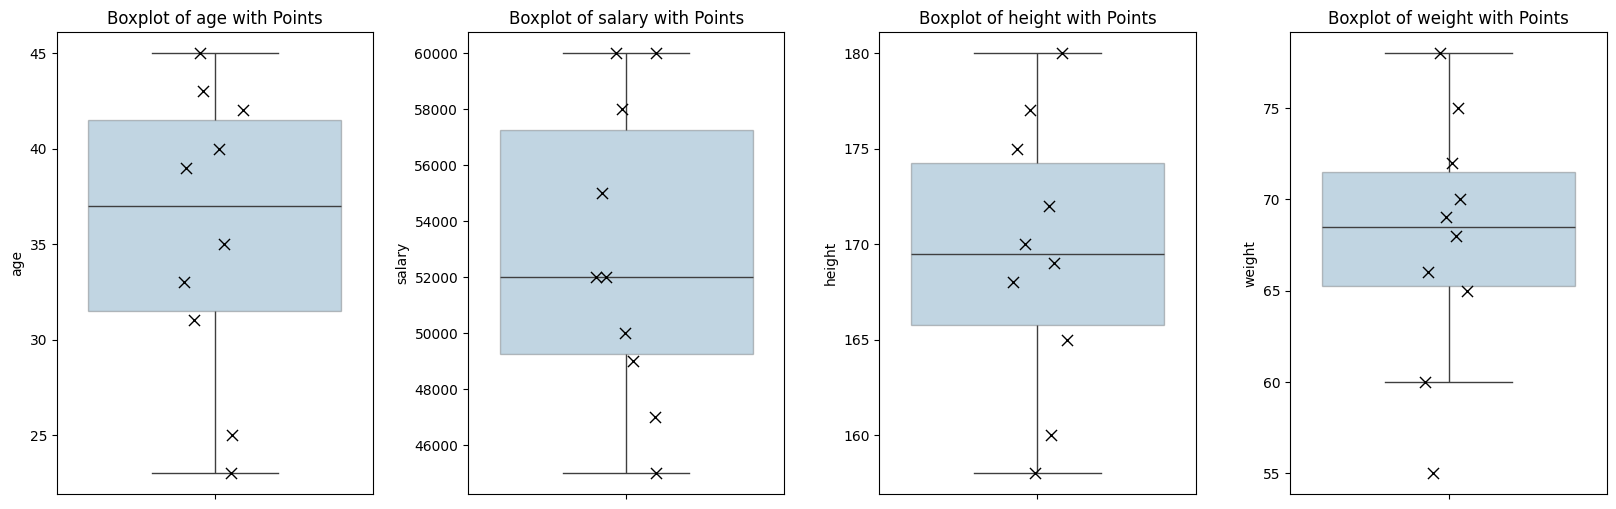

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def show_boxplots_with_points(df, columns):
    """
    Show boxplots of four variables in a DataFrame side by side with overlaid data points as crosses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names of the variables to visualize.

    Returns:
    None
    """
    # Set up the GridSpec layout
    fig = plt.figure(figsize=(20, 6))
    # Change the second number for the number of graphs
    gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 1], wspace=0.3)
    
    # Iterate over the columns and create a subplot for each
    for i, column in enumerate(columns):
        ax = fig.add_subplot(gs[i])
        sns.boxplot(y=df[column], orient='v', ax=ax, showfliers=False, boxprops={'alpha': 0.3})
        sns.stripplot(y=df[column], jitter=True, marker='x', color='black', size=8, linewidth=1, ax=ax)
        ax.set_title(f'Boxplot of {column} with Points')
    
    # Display the plots
    plt.show()

# Example usage
import pandas as pd

# Example DataFrame
data = {
    'age': [23, 45, 31, 35, 43, 25, 40, 42, 33, 39],
    'salary': [50000, 60000, 45000, 52000, 58000, 47000, 55000, 60000, 49000, 52000],
    'height': [165, 170, 175, 160, 180, 158, 172, 169, 177, 168],
    'weight': [55, 78, 68, 72, 70, 60, 65, 75, 69, 66]
}
df = pd.DataFrame(data)

# Show boxplots with all points as crosses for 'age', 'salary', 'height', and 'weight'
show_boxplots_with_points(df, ['age', 'salary', 'height', 'weight'])


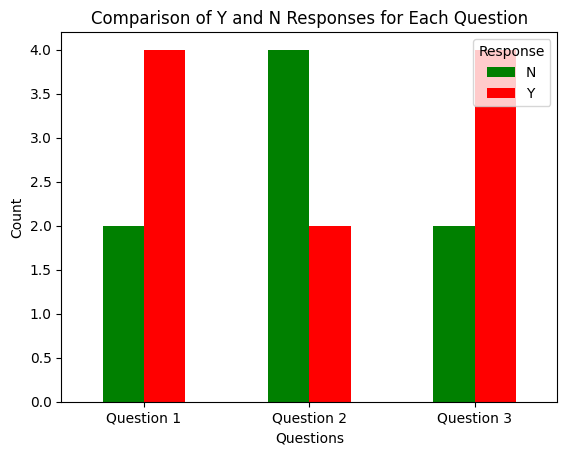

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_yes_no_distribution(df, questions):
    """
    Plot a bar graph to compare the number of 'Y' and 'N' responses for each question.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    questions (list of str): List of column names representing the questions.

    Returns:
    None
    """
    # Count the number of 'Y' and 'N' for each question
    counts = df[questions].apply(lambda x: x.value_counts()).fillna(0)
    
    # Plot the bar graph
    counts.T.plot(kind='bar', stacked=False, color=['green', 'red'])
    
    plt.title('Comparison of Y and N Responses for Each Question')
    plt.ylabel('Count')
    plt.xlabel('Questions')
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.legend(title='Response')
    plt.show()

# Example usage
data = {
    'Question 1': ['Y', 'N', 'Y', 'Y', 'N', 'Y'],
    'Question 2': ['N', 'N', 'Y', 'N', 'Y', 'N'],
    'Question 3': ['Y', 'Y', 'N', 'N', 'Y', 'Y']
}
df = pd.DataFrame(data)

# Plot the distribution of 'Y' and 'N' for each question
plot_yes_no_distribution(df, ['Question 1', 'Question 2', 'Question 3'])
